## Assignment Week 5

This week we are using numpy and matplotlib

In [1]:
# Start by loading the relevant libraries
import numpy as np

### Numpy: Magic Square

A <A HREF="https://en.wikipedia.org/wiki/Magic_square">magic square</A> is a matrix in which the sum of all rows, columns and diagonals are the same.
You can verify this fact for the matrix below by:
  * calculating an array containing the sums of all rows
  * calculate the minimum and maximum of this array
  * calculating an array containing the sum of all columns
  * calculate the minimum and maximum of this array
  * calculating the sum of both diagonals
  * check that both minimums and maximums and diagonals are the same value.

```python
msquare = np.array([
    [17, 24,  1,  8, 15],
    [23,  5,  7, 14, 16],
    [ 4,  6, 13, 20, 22],
    [10, 12, 19, 21,  3],
    [11, 18, 25,  2,  9]])
```

**Assignment 5.1**

Write a function **is_magic_square()** that takes a matrix as input and returns **True** if the matrix is a magic square and **False** otherwise. Use the matrix above to test your function.

*Hint*: Use np.diag and np.fliplr to get the diagonals of a matrix.


In [49]:
def is_magic_square(msquare):
    
    # test the input matrix
    if msquare.ndim < 2:
        print("The input matrix is not valid")
        return False
    if msquare.shape[0] != msquare.shape[1] :
        print("The input matrix is not a square matrix")
        return False
    
    # sum of the matrix diagonal
    diag_sum = np.diag(msquare).sum()
    
    # sum of the reverse diagonal
    rev_diag_sum = np.diag(np.fliplr(msquare)).sum()
    
    # sum of the column and row
    col_sum = msquare.sum(axis = 0)
    row_sum = msquare.sum(axis = 1)
    col_row_sum = np.append(col_sum, row_sum)
    
    # append it ro one array
    all_axis_sum = np.append(col_row_sum, [diag_sum, rev_diag_sum])
    
    # if all of the sum are equal it means the length of array's set will consist of only one element = the sum
    if len(set(all_axis_sum)) == 1:
        # the matrix is magic square matrix
        return True
    else:
        return False

# test with empty matrix
x = []
msquare = np.array(x)
is_magic_square(msquare)

# test with magic square matrix
msquare = np.array([
    [17, 24,  1,  8, 15],
    [23,  5,  7, 14, 16],
    [ 4,  6, 13, 20, 22],
    [10, 12, 19, 21,  3],
    [11, 18, 25,  2,  9]])
is_magic_square(msquare)


The input matrix is not valid


True

### Generating Magic Squares

The above function can be used in a (crude) method to generate magic squares

**Assignment 5.2**

Write a function **generateMagicSquare()** that generates a 3x3 magic square (containing numbers 1...9). 

Use the following algorithm:

  * Use the function **is_magic_square()** from the previous question to check if a matrix is a valid magic square or not.
  * Generate random 3x3 squares filled with the exact numbers 1..9 in some order and check if that matrix is a magic square. If so, print the magic square.
  
  * You may need to generate 100,000 matrices to find one that is a magic square (by chance).
  
*Hint*: Use np.random.permutation to generate a random permutation of an array.

In [52]:
def generateMagicSquare():
    
    # counter
    i = 0
    
    # flag whether magic square matrix is found
    magic_flag = False
    
    # keep looping when magic square matrix is not found
    while not magic_flag:
        # generate array 0-8
        gen_arr = np.random.permutation(9)
        # +1 so it will be 1-9
        gen_arr += 1
        # reshape to 3x3 matrix
        arr = gen_arr.reshape((3, 3))
        
        # i-th iteration
        i += 1
        #print(i, is_magic_square(arr))
        #print(arr)

        if is_magic_square(arr):
            magic_flag = True
         
    print("magic square is found at {0}-th iteration".format(i))
    print(arr)
    
generateMagicSquare() 
        


magic square is found at 100138-th iteration
[[4 3 8]
 [9 5 1]
 [2 7 6]]


### Matplotlib: Functions

In [53]:
# Also make sure that you have the correct libraries loaded here

%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np

### More grading

This question continues from the exercise made in class (see file 'Week5_numpy_class.ipynb' and 'Week5_numpy_class-s.ipynb'). We quickly recreate the dataset here, see the aforementioned files for details.



In [54]:
# create students and grades arrays, using random grades
students = np.array(['Anne', 'Bob', 'Mary', 'John', 'Julia', 'Mike', 'Susan', 'Zach'])
grades = np.random.rand( 8,20 )* 6 + 4

# create an array with the average grades per student 
avg_grades = grades.mean(axis=1)

# create a masked array where we mask away all grades below 5.8
masked_grades = np.ma.masked_array( grades, grades < 5.8 )

# calculate the averages per student
avg_grades = masked_grades.mean( axis = 1 ) 

# print the array to see what we have
avg_grades

masked_array(data = [7.9028064591877545 8.021978310900815 7.96382541418666 8.194622519311618
 7.677145926989296 7.923012805967399 8.48732492937225 7.991223191535453],
             mask = [False False False False False False False False],
       fill_value = 1e+20)

 **Assignment 5.3**

Using the above data, do the following:

  1. Plot the avarage grade per student in a bar chart, set the axis and labels accordingly.
  2. Plot the average grades for each of the 20 assignments.
  3. Try to fit a line to this line and try to predict the average grades for the next assignment. Plot the result.
     
     *Hint* Use np.polyfit() to find a fitting function. Use np.polyval() to evaluate a polynomial. How does the degree of the polynomial effect the fitting?

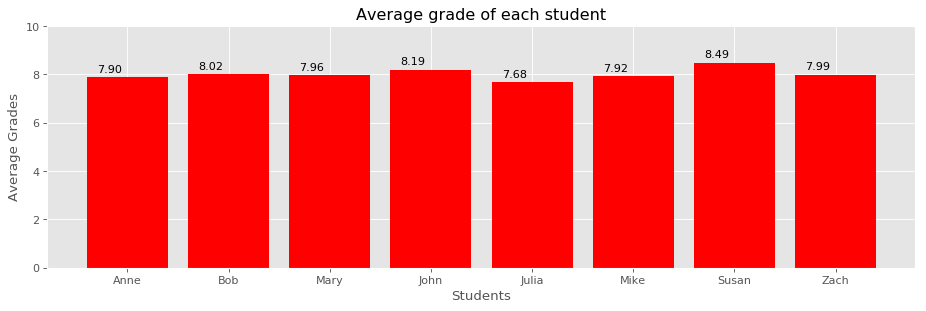

In [55]:
# 5.3.1 Plot the avarage grade per student in a bar chart, set the axis and labels accordingly.

# Create a figure of size 14x4 inches, 80 dots per inch
plt.figure(figsize=(14, 4), dpi=80)

# bar chart of average of student's grades
plt.bar( np.arange( avg_grades.shape[0]), avg_grades, align='center', color='red' )

# limit the y-axis
plt.axis( [None,None,0,10] ) 

# create a tick location and label
plt.xticks( np.arange( len(students) ), students)

# axis's label
plt.xlabel("Students")
plt.ylabel("Average Grades")

plt.title("Average grade of each student")
# display the grade above the bar chart
for (i, grade) in enumerate(avg_grades):
    plt.text( i - 0.3, grade + 0.2, "%.2f" % (grade) )
    


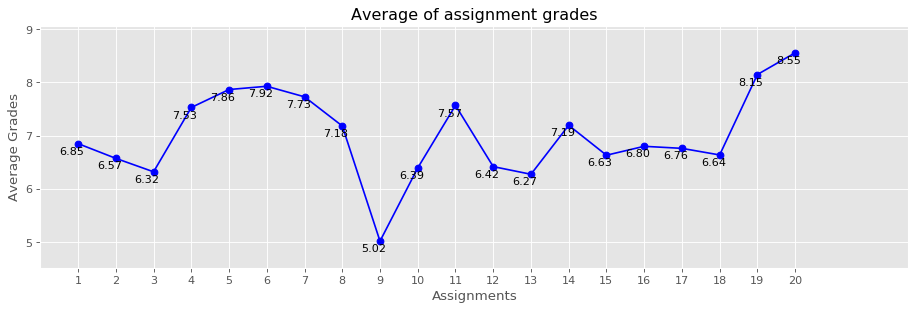

In [56]:
# 5.3.2 Plot the average grades for each of the 20 assignments.

# create an array with the average grades per assignment 
# I assume we include all the grades, including the fail ones
avg_assignment_grades = grades.mean(axis=0)

# Create a figure of size 14x4 inches, 80 dots per inch
plt.figure(figsize=(14, 4), dpi=80)
plt.style.use('ggplot')

# plot the bar chart
#plt.bar( np.arange( avg_assignment_grades.shape[0])*2, avg_assignment_grades, color='blue')

# but the line is better
plt.plot(np.arange( avg_assignment_grades.shape[0]), avg_assignment_grades, 'b-o')

# generate the axis limit depend on the upper and lower limit of the average grade
plt.axis( [-1,22,avg_assignment_grades.min()-0.5,avg_assignment_grades.max()+0.5] ) 

# xtick location and label
plt.xticks( np.arange(avg_assignment_grades.shape[0]), np.arange(1,21))

# axis label
plt.xlabel("Assignments")
plt.ylabel("Average Grades")

# Plot a title
plt.title("Average of assignment grades")

# display the grade near the point
for (i, grade) in enumerate(avg_assignment_grades):
    plt.text( i-0.5, grade-0.2, "%.2f" % (grade) )

5th order polynomial grade prediction  9.51594591435
10th order polynomial grade prediction  -996.6150934


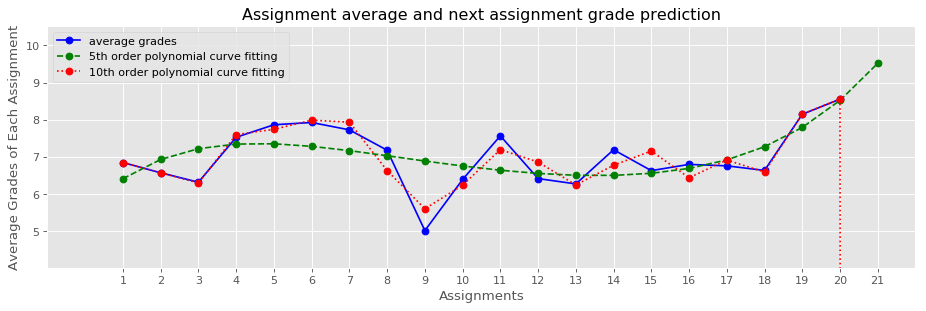

In [57]:
# 5.3.3
# Try to fit a line to this line and try to predict the average grades for the next assignment. Plot the result.
# Hint Use np.polyfit() to find a fitting function. Use np.polyval() to evaluate a polynomial. 
# How does the degree of the polynomial effect the fitting?

# create x-array as the assignment number 
x = np.arange(1,21)
y = avg_assignment_grades

# fitting the polynomial representing the curve
poly1 = np.polyfit(x,y,5)
poly2 = np.polyfit(x,y,15)

# add one more data range as the assignment prediction
xp = np.arange(1,22)

# plot the curve, the original and both of polynomial prediction 
plt.figure(figsize=(14, 4), dpi=80)
plt.plot(x, avg_assignment_grades, 'b-o', label='average grades')
plt.plot(xp, np.polyval(poly1, xp), 'g--o', label = '5th order polynomial curve fitting')
plt.plot(xp, np.polyval(poly2, xp), 'r:o', label = '10th order polynomial curve fitting')

# extend the ticks
plt.xticks(xp, np.arange(1,22)) 
miny = np.append(np.polyval(poly1, xp),avg_assignment_grades).min()-1
maxy = np.append(np.polyval(poly1, xp),avg_assignment_grades).max()+1
plt.axis( [-1,22,miny,maxy] ) 

# axis label
plt.xlabel("Assignments")
plt.ylabel("Average Grades of Each Assignment")

# Plot a title
plt.title("Assignment average and next assignment grade prediction")

# Show a legend
plt.legend()

"""
The higher polynomial might be over-fitting the curve and at some point is oscillating wildly.
As we can see from the prediction value for the next average assignment grade
"""

print("5th order polynomial grade prediction ",np.polyval(poly1, 21))
print("10th order polynomial grade prediction ",np.polyval(poly2, 21))

In [58]:
# We can also make it interactive by using the interact function
from ipywidgets import interact

In [62]:
@interact(first_poly=(0,15,1))
def h(first_poly):
    
    # create x-array as the assignment number 
    x = np.arange(1,21)
    y = avg_assignment_grades

    # fitting the polynomial representing the curve
    poly1 = np.polyfit(x,y,first_poly)

    # add one more data range as the assignment prediction
    xp = np.arange(1,22)

    # plot the curve, the original and both of polynomial prediction 
    plt.figure(figsize=(14, 4), dpi=80)
    plt.plot(x, avg_assignment_grades, 'b-o', label='average grades')
    plt.plot(xp, np.polyval(poly1, xp), 'g--o', label = 'grade prediction: {0}-th order polynomial'.format(first_poly))

    # extend the ticks
    plt.xticks(xp, np.arange(1,22)) 
    miny = np.append(np.polyval(poly1, xp),avg_assignment_grades).min()-1
    maxy = np.append(np.polyval(poly1, xp),avg_assignment_grades).max()+1
    plt.axis( [-1,22,miny,maxy] ) 
    
    # axis label
    plt.xlabel("Assignments")
    plt.ylabel("Average Grades of Each Assignment")
    # Plot a title
    plt.title("Assignment average and next assignment grade prediction")

    # Show a legend
    plt.legend()
    
    prediction = np.polyval(poly1, 21)
    plt.annotate('Prediction: {:0.1f}'.format(prediction), fontsize=12, xy=(21,prediction), xytext=(21,prediction+1), arrowprops={'arrowstyle':'simple'})
    
    print("21th assignment grade average predicition is ", prediction)
    # it somehow created an additional new plot instead when the @interact parameter is slid without plt.show() below
    plt.show()